In [ ]:
!pip install scikit-surprise

import warnings
warnings.filterwarnings('ignore')

# Data handling and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical analysis and preprocessing
from scipy.stats import norm, stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    roc_auc_score, confusion_matrix, accuracy_score, f1_score,
    roc_curve, classification_report, precision_score, recall_score)

# Cosine similarity and sparse matrices
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

# Surprise library for recommendation systems
from surprise import Reader, Dataset, SVD, SVDpp, NMF, SlopeOne, CoClustering, accuracy
from surprise.model_selection import cross_validate, train_test_split
from surprise import accuracy

# Other utilities
from collections import defaultdict
import ast
import matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 5.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp311-cp311-linux_x86_64.whl size=2505219 sha256=9ebe3ec5af41085f15dcc5852629881e44a7ee92f8442abb3462503dfef8f7a7
  Stored in directory: /root/.cache/pip/wheels/2a/8f/6e/7e2899163e2d85d8266daab4aa1cdabec7a6c56f83c015b5af
Successfully built scikit-surprise



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>
    ColabKernelApp.launch_instance()
  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.11/dist-package

ImportError: numpy.core.multiarray failed to import (auto-generated because you didn't call 'numpy.import_array()' after cimporting numpy; use '<void>numpy._import_array' to disable if you are certain you don't need it).

In [ ]:
import pandas as pd
# Load datasets
path = "/content/Amazon Sale Report.csv"

# Load datasets
df = pd.read_csv(path)

# Print confirmation
print("Datasets Loaded Successfully!")

Datasets Loaded Successfully!


In [ ]:
# Check for missing values
print("Missing values in Users data:")
print(df.isnull().sum())

Missing values in Users data:
index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
currency               7795
Amount                 7795
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
promotion-ids         49153
B2B                       0
fulfilled-by          89698
Unnamed: 22           49050
dtype: int64


In [ ]:
df = df[df['fulfilled-by'].notna()]
df = df[df['Unnamed: 22'].notna()]
df = df[df['Amount'].notna()]
df = df[df['currency'].notna()]
df = df[df['ship-state'].notna()]
df = df[df['ship-city'].notna()]
df = df[df['promotion-ids'].notna()]

In [ ]:
print("Missing values in Users data:")
print(df.isnull().sum())

Missing values in Users data:
index                 0
Order ID              0
Date                  0
Fulfilment            0
Sales Channel         0
ship-service-level    0
Style                 0
SKU                   0
Category              0
Size                  0
ASIN                  0
Courier Status        0
Qty                   0
currency              0
Amount                0
ship-city             0
ship-state            0
ship-country          0
B2B                   0
dtype: int64


In [ ]:
df = df.drop('SKU', axis=1)

In [ ]:
df = df.drop('Courier Status', axis=1)

In [ ]:
df = df.drop('ship-service-level', axis=1)

In [ ]:
df = df.drop('Sales Channel ', axis=1)

In [ ]:
df = df.drop('Style', axis=1)

In [ ]:
# Save cleaned DataFrame to CSV
df.to_csv('cleaned_data.csv', index=False)

# Download the file to your local system
from google.colab import files
files.download('cleaned_data.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Check for duplicates
print(f"Duplicates in dataset: {df.duplicated().sum()}")

Duplicates in dataset: 0


In [ ]:
# Descriptive stats for Amount of product
print("Sales Dataset:")
print(df['Amount'].describe())


Sales Dataset:
count    19379.000000
mean       673.245162
std        287.866514
min          0.000000
25%        471.000000
50%        678.000000
75%        786.000000
max       2796.000000
Name: Amount, dtype: float64


In [ ]:
import pandas as pd
df=pd.read_csv('/content/cleaned_data.csv')
df['Amount'] = df['Amount'].astype(int)
print("Column Updated !\n")
print(df)

Column Updated !

        index             Order ID      Date       Category Size  Qty  \
0       49051  408-4858463-2356347  05-31-22          kurta    M    1   
1       49077  402-7697834-2682766  05-31-22            Top  XXL    1   
2       49081  402-7031777-0396341  05-31-22  Western Dress   XS    1   
3       49082  408-1235521-4337163  05-31-22  Western Dress    L    1   
4       49083  403-3845187-4421165  05-31-22  Western Dress   XL    1   
...       ...                  ...       ...            ...  ...  ...   
19374  128872  405-4724097-1016369  06-01-22   Ethnic Dress    S    1   
19375  128873  405-4724097-1016369  06-01-22            Set    S    1   
19376  128874  405-4724097-1016369  06-01-22            Set    S    1   
19377  128887  405-6493630-8542756  05-31-22            Top    M    1   
19378  128891  403-0317423-9322704  05-31-22  Western Dress    M    1   

      currency  Amount         ship-city       ship-state ship-country    B2B  
0          INR     888   

In [ ]:
Q1 = df['Amount'].quantile(0.25)
Q3 = df['Amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

amount_outliers = df[(df['Amount'] < lower_bound) | (df['Amount'] > upper_bound)]

print("📌 Amount Outliers:")
print(amount_outliers[['Order ID','Category', 'Amount']])
print(f"Total Amount Outliers: {len(amount_outliers)}\n")

📌 Amount Outliers:
                  Order ID Category  Amount
17     408-7891501-1393915      Set    1556
35     403-9810681-1817140      Set    1477
37     403-2595882-9787511      Set    1477
54     404-7920226-5773169      Set    1399
123    403-2388768-9793909      Set    1556
...                    ...      ...     ...
19277  406-2175029-9825118      Set    1369
19308  402-9121173-3873936      Set    1399
19320  407-6276213-8167515      Set    1477
19345  404-4864004-5237932      Set    1442
19375  405-4724097-1016369      Set    1523

[744 rows x 3 columns]
Total Amount Outliers: 744



In [ ]:
df.describe()

,index,Qty,Amount
count,19379.000000,19379.000000,19379.000000
mean,86650.405542,1.004799,673.245162
std,22204.535858,0.082081,287.866514
min,49051.000000,1.000000,0.000000
25%,67813.000000,1.000000,471.000000
50%,83317.000000,1.000000,678.000000
75%,105153.500000,1.000000,786.000000
max,128891.000000,5.000000,2796.000000


In [ ]:
# Keep only rows where Amount is less than or equal to 2796
df = df[df['Amount'] <=2796]

print("✅ Kept rows where Amount is less than or equal to 2796.")
print(f"📚 Remaining rows: {df.shape[0]}")


✅ Kept rows where Amount is less than or equal to 2796.
📚 Remaining rows: 19329


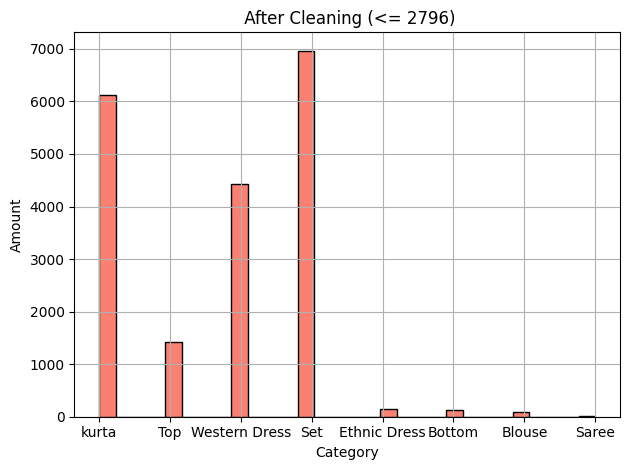

In [ ]:
import matplotlib.pyplot as plt
plt.subplot(1, 1, 1)
df['Category'].hist(bins=30, color='salmon', edgecolor='black')
plt.title(' After Cleaning (<= 2796)')
plt.xlabel('Category')
plt.ylabel('Amount')

plt.tight_layout()
plt.show()

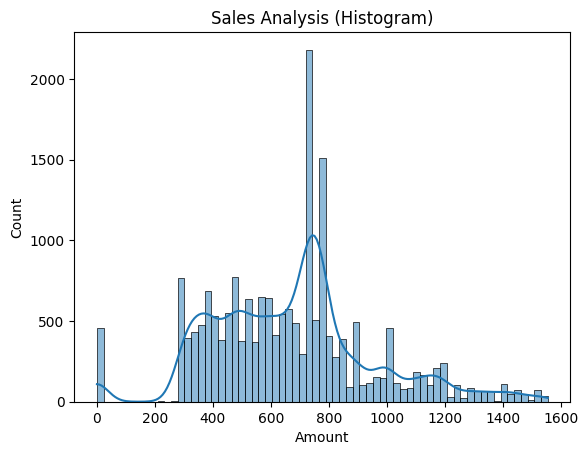

In [ ]:
import seaborn as sns
sns.histplot(df['Amount'], kde=True)
plt.title('Sales Analysis (Histogram)')
plt.show()

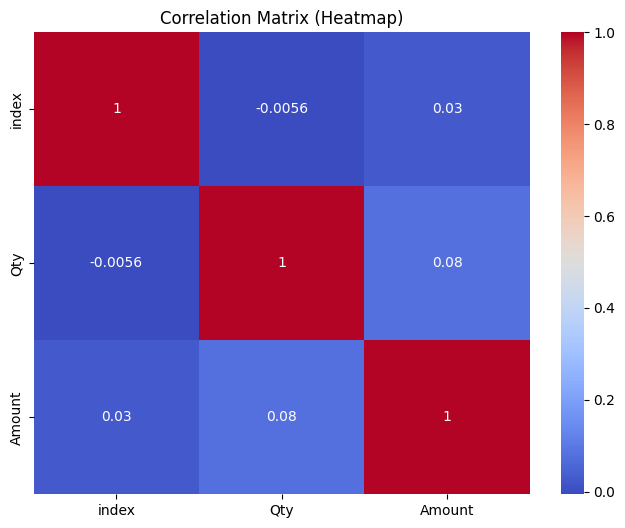

In [ ]:
numerical_cols = df.select_dtypes(include='number').columns
if len(numerical_cols) > 1:
    plt.figure(figsize=(8, 6))
    correlation_matrix = df[numerical_cols].dropna().corr()
    if not correlation_matrix.empty:
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
        plt.title('Correlation Matrix (Heatmap)')
        plt.show()
    else:
        print("Correlation matrix is empty. Check your dataset.")

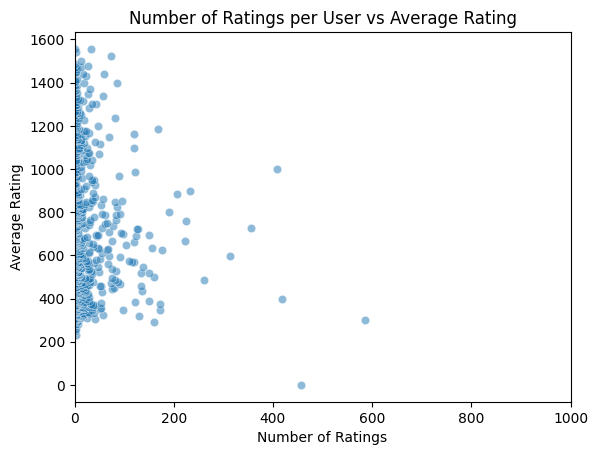

In [ ]:
user_stats = df.groupby('Amount')['Amount'].agg(['count', 'mean']).reset_index()
plt.xlim(0, 1000)  # Or adjust based on your data

sns.scatterplot(data=user_stats, x='count', y='mean', alpha=0.5)
plt.title("Number of Ratings per User vs Average Rating")
plt.xlabel("Number of Ratings")
plt.ylabel("Average Rating")
plt.show()

In [ ]:
import pandas as pd
df=pd.read_csv('/content/cleaned_data.csv')


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


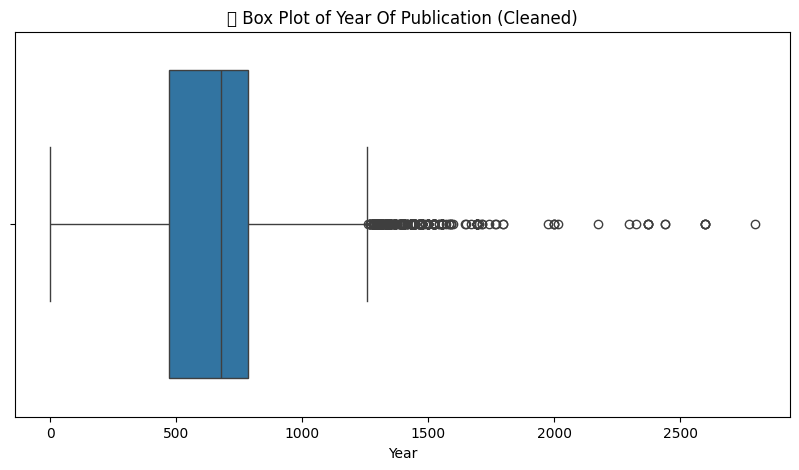

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')
df_clean = df.dropna(subset=['Amount'])
df_clean = df_clean[(df_clean['Amount'] >= 0) &
                                (df_clean['Amount'] <= 2796)]
plt.figure(figsize=(10, 5))
sns.boxplot(x=df_clean['Amount'])
plt.title('📦 Box Plot of Year Of Publication (Cleaned)')
plt.xlabel('Year')
plt.show()


In [ ]:
import pandas as pd

# Group by category and sum the quantity
category_totals = df.groupby('Category')['Qty'].sum().reset_index()

# Optional: Sort by total quantity (descending)
category_totals = category_totals.sort_values(by='Qty', ascending=False)

# Display result
print(category_totals)


        Category   Qty
4            Set  7027
7          kurta  6179
6  Western Dress  4451
5            Top  1435
2   Ethnic Dress   159
1         Bottom   126
0         Blouse    83
3          Saree    12


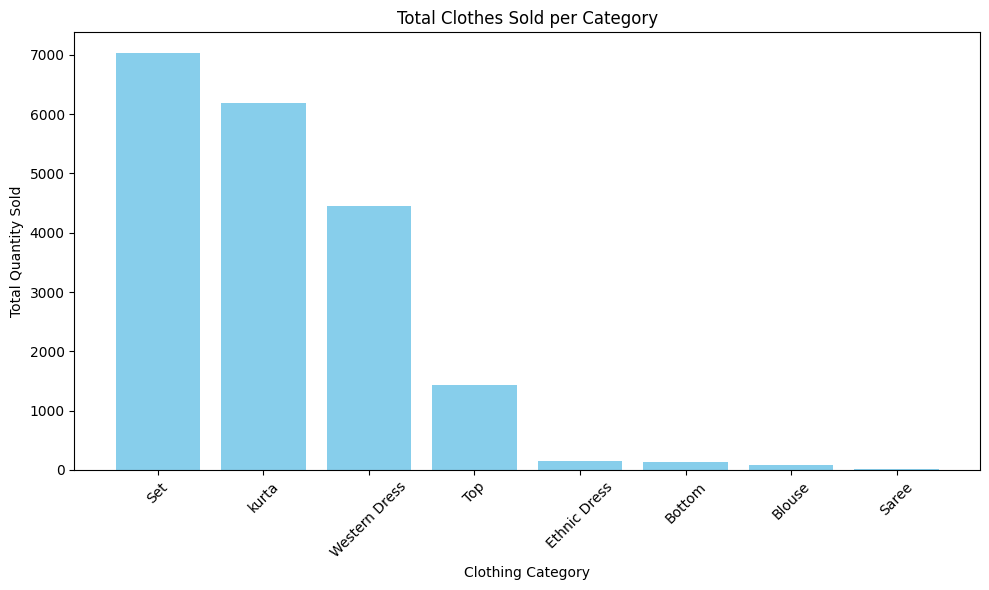

In [ ]:
import matplotlib.pyplot as plt

# Group by category and sum quantity
category_totals = df.groupby('Category')['Qty'].sum().reset_index()

# Sort categories by total quantity
category_totals = category_totals.sort_values(by='Qty', ascending=False)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(category_totals['Category'], category_totals['Qty'], color='skyblue')
plt.xlabel('Clothing Category')
plt.ylabel('Total Quantity Sold')
plt.title('Total Clothes Sold per Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


       ship-state   Qty
25    MAHARASHTRA  3236
20      KARNATAKA  2441
43     TAMIL NADU  1725
44      TELANGANA  1703
46  UTTAR PRADESH  1639


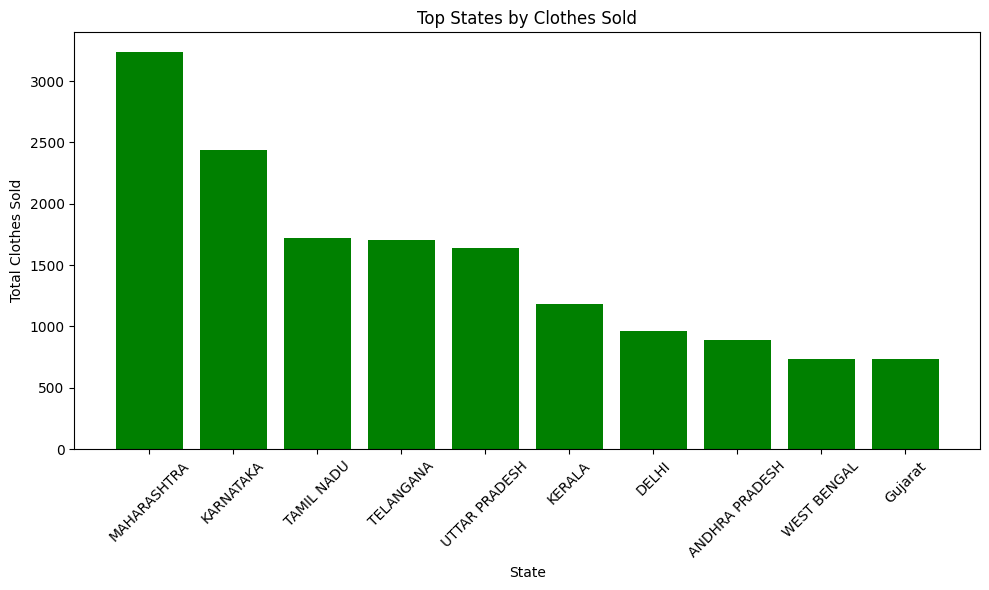

In [ ]:
state_totals = df.groupby('ship-state')['Qty'].sum().reset_index()

# Sort by quantity sold (descending)
state_totals = state_totals.sort_values(by='Qty', ascending=False)

# Display top states
print(state_totals.head())

# Optional: Bar chart of top 10 states
plt.figure(figsize=(10, 6))
plt.bar(state_totals['ship-state'][:10], state_totals['Qty'][:10], color='green')
plt.xlabel('State')
plt.ylabel('Total Clothes Sold')
plt.title('Top States by Clothes Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-27-5eda1fd02027>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=city_totals, x='ship-city', y='Qty', palette='Set3')  # Try 'Set3', 'husl', 'pastel', etc.


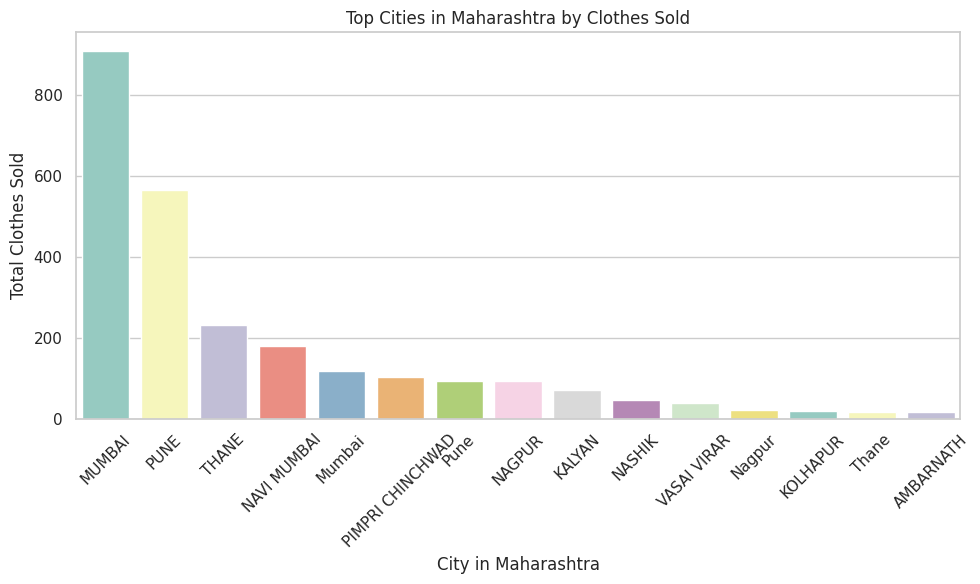

In [ ]:
maharashtra_df = df[df['ship-state'] == 'MAHARASHTRA']

# Group by city and sum quantity
city_totals = maharashtra_df.groupby('ship-city')['Qty'].sum().reset_index()
city_totals = city_totals.sort_values(by='Qty', ascending=False).head(15)

# Set plot size and style
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Barplot
sns.barplot(data=city_totals, x='ship-city', y='Qty', palette='Set3')  # Try 'Set3', 'husl', 'pastel', etc.

# Customize labels
plt.xlabel('City in Maharashtra')
plt.ylabel('Total Clothes Sold')
plt.title('Top Cities in Maharashtra by Clothes Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

📉 City with the least clothes delivered in Arunachal Pradesh: Aalo (1 items)


<ipython-input-26-d0fa5796c095>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=city_totals, x='ship-city', y='Qty', palette='Blues_r')


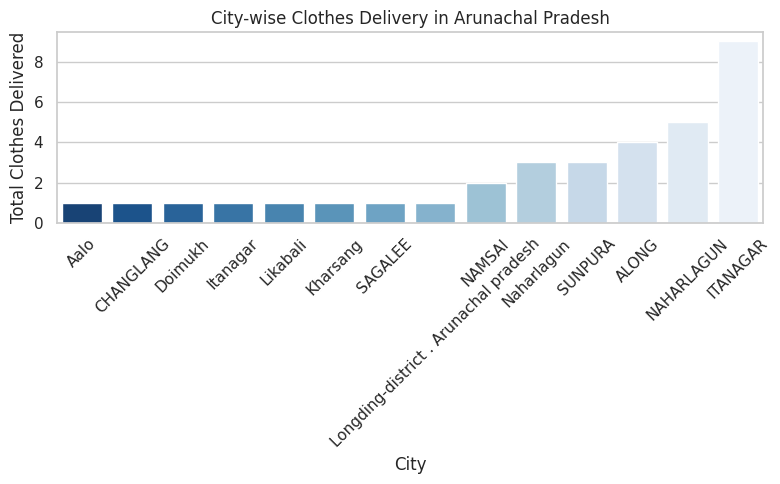

In [ ]:
arunachal_df = df[df['ship-state'] == 'ARUNACHAL PRADESH']

# Group by city and sum quantity
city_totals = arunachal_df.groupby('ship-city')['Qty'].sum().reset_index()

# Sort by quantity (ascending)
city_totals = city_totals.sort_values(by='Qty')

# Print the city with the least clothes delivered
least_city = city_totals.iloc[0]
print(f"📉 City with the least clothes delivered in Arunachal Pradesh: {least_city['ship-city']} ({least_city['Qty']} items)")

# Optional: Plot all cities in Arunachal Pradesh
plt.figure(figsize=(8, 5))
sns.set(style="whitegrid")
sns.barplot(data=city_totals, x='ship-city', y='Qty', palette='Blues_r')
plt.title('City-wise Clothes Delivery in Arunachal Pradesh')
plt.xlabel('City')
plt.ylabel('Total Clothes Delivered')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-23-55148098308f>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=size_totals, x='Size', y='Qty', palette='coolwarm')


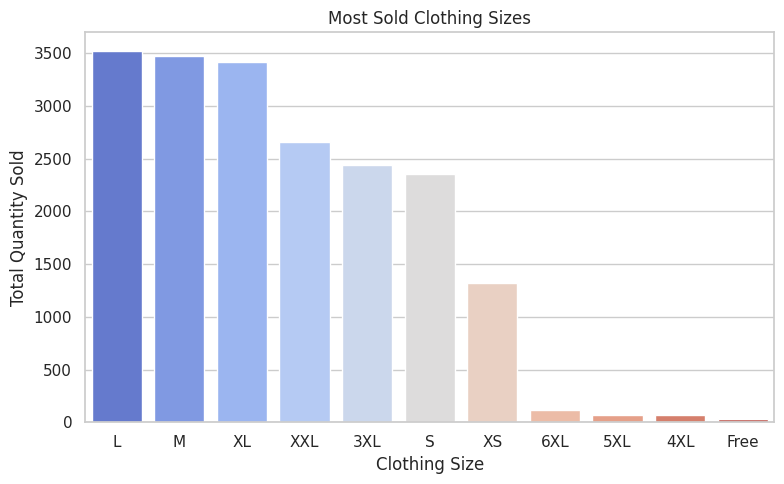

In [ ]:
size_totals = df.groupby('Size')['Qty'].sum().reset_index()

# Sort by quantity
size_totals = size_totals.sort_values(by='Qty', ascending=False)

# Plot
plt.figure(figsize=(8, 5))
sns.set(style="whitegrid")
sns.barplot(data=size_totals, x='Size', y='Qty', palette='coolwarm')

# Labels and title
plt.xlabel('Clothing Size')
plt.ylabel('Total Quantity Sold')
plt.title('Most Sold Clothing Sizes')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

# Example: let's say you're predicting 'Amount' using other columns
# Step 1: Prepare X and y
X = df.drop('Amount', axis=1)   # Features (drop target column)
y = df['Amount']                # Target variable

# Step 2: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Output shapes
print("Training set:", X_train.shape)
print("Testing set:", X_test.shape)


Training set: (15503, 11)
Testing set: (3876, 11)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

df = df[['Category', 'ship-state', 'ship-city', 'Amount']]

# One-hot encode categorical columns
df_encoded = pd.get_dummies(df, columns=['Category', 'ship-state', 'ship-city'], drop_first=True)

# Split features and target
X = df_encoded.drop('Amount', axis=1)
y = df_encoded['Amount']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print("✅ Model trained successfully!")
print("📉 Mean Squared Error on test set:", mse)
y_pred = model.predict(X_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print results
print("📊 Model Evaluation Metrics:")
print(f"🔹 Mean Absolute Error (MAE): {mae:.2f}")
print(f"🔹 Mean Squared Error (MSE): {mse:.2f}")
print(f"🔹 Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"🔹 R² Score: {r2:.4f}")



✅ Model trained successfully!
📉 Mean Squared Error on test set: 64398.50345480477
📊 Model Evaluation Metrics:
🔹 Mean Absolute Error (MAE): 179.77
🔹 Mean Squared Error (MSE): 64398.50
🔹 Root Mean Squared Error (RMSE): 253.77
🔹 R² Score: 0.2481


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Train a Random Forest model
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

# Predict on test set
y_pred_rf = model_rf.predict(X_test)

# Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print results
print("📊 Random Forest Model Evaluation Metrics:")
print(f"🔹 Mean Absolute Error (MAE): {mae_rf:.2f}")
print(f"🔹 Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"🔹 Root Mean Squared Error (RMSE): {rmse_rf:.2f}")
print(f"🔹 R² Score: {r2_rf:.4f}")


📊 Random Forest Model Evaluation Metrics:
🔹 Mean Absolute Error (MAE): 174.98
🔹 Mean Squared Error (MSE): 63067.36
🔹 Root Mean Squared Error (RMSE): 251.13
🔹 R² Score: 0.2636


In [ ]:
import pandas as pd
df=pd.read_csv('/content/cleaned_data.csv')

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

df = df[['Category', 'Amount', 'Qty', 'ship-state']]  # Adjust if you have more/less columns

# 🎯 Create a target variable — you can modify the logic!
df['WillBuy'] = df['Amount'].apply(lambda x: 1 if x >= 1000 else 0)

# 🔄 Encode categorical features
label_encoders = {}
for col in ['Category', 'ship-state']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# 🔍 Features and target
X = df.drop('WillBuy', axis=1)
y = df['WillBuy']

# ✂️ Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -----------------------------------------------
# ✅ Gradient Boosting Classifier
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
gb_preds = gb_model.predict(X_test)

print("📈 Gradient Boosting Results:")
print("Accuracy:", accuracy_score(y_test, gb_preds))
print(confusion_matrix(y_test, gb_preds))
print(classification_report(y_test, gb_preds))

# -----------------------------------------------
# ✅ XGBoost Classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)

print("⚡ XGBoost Results:")
print("Accuracy:", accuracy_score(y_test, xgb_preds))
print(confusion_matrix(y_test, xgb_preds))
print(classification_report(y_test, xgb_preds))


<ipython-input-5-e0ca550891e5>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['WillBuy'] = df['Amount'].apply(lambda x: 1 if x >= 1000 else 0)
<ipython-input-5-e0ca550891e5>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
<ipython-input-5-e0ca550891e5>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

📈 Gradient Boosting Results:
Accuracy: 1.0
[[3412    0]
 [   0  464]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3412
           1       1.00      1.00      1.00       464

    accuracy                           1.00      3876
   macro avg       1.00      1.00      1.00      3876
weighted avg       1.00      1.00      1.00      3876



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:16:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


⚡ XGBoost Results:
Accuracy: 1.0
[[3412    0]
 [   0  464]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3412
           1       1.00      1.00      1.00       464

    accuracy                           1.00      3876
   macro avg       1.00      1.00      1.00      3876
weighted avg       1.00      1.00      1.00      3876



📊 Model Comparison Table:
                     Model     MAE       MSE    RMSE  R2 Score  Accuracy  \
0      Random Forest (Reg)  174.98  63067.36  251.13    0.2636       NaN   
1  Gradient Boosting (Cls)     NaN       NaN     NaN       NaN       1.0   
2            XGBoost (Cls)     NaN       NaN     NaN       NaN       1.0   

   Precision (1)  Recall (1)  F1 Score (1)  
0            NaN         NaN           NaN  
1            1.0         1.0           1.0  
2            1.0         1.0           1.0  


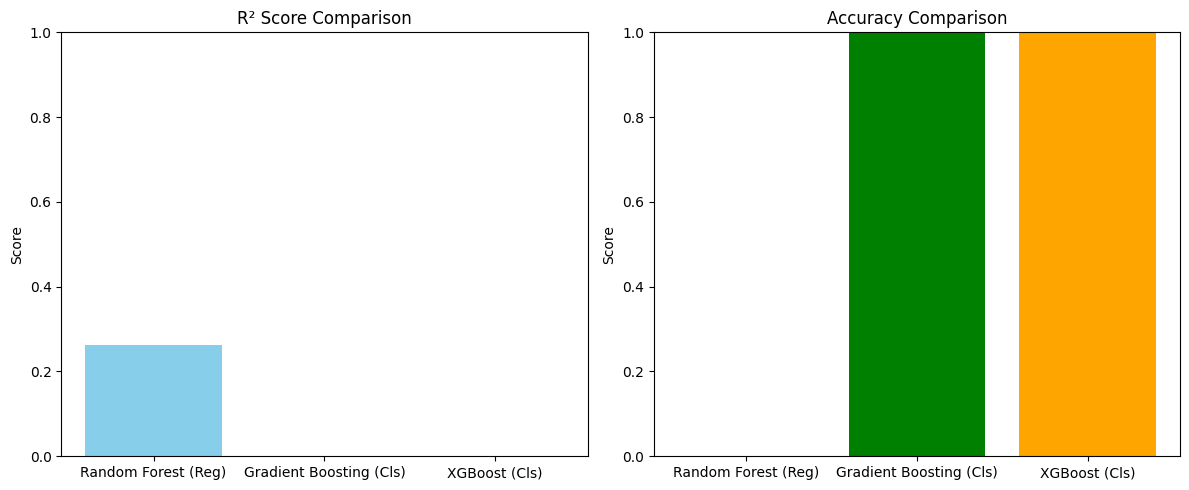

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Create DataFrame with evaluation metrics
data = {
    'Model': ['Random Forest (Reg)', 'Gradient Boosting (Cls)', 'XGBoost (Cls)'],
    'MAE': [174.98, None, None],
    'MSE': [63067.36, None, None],
    'RMSE': [251.13, None, None],
    'R2 Score': [0.2636, None, None],
    'Accuracy': [None, 1.0, 1.0],
    'Precision (1)': [None, 1.0, 1.0],
    'Recall (1)': [None, 1.0, 1.0],
    'F1 Score (1)': [None, 1.0, 1.0],
}

comparison_df = pd.DataFrame(data)
print("📊 Model Comparison Table:")
print(comparison_df)


# Plotting the comparison
plt.figure(figsize=(12, 5))

# R² Score (Regression metric)
plt.subplot(1, 2, 1)
r2_values = [0.2636, 0, 0]
plt.bar(data['Model'], r2_values, color=['skyblue', 'gray', 'gray'])
plt.title('R² Score Comparison')
plt.ylabel('Score')
plt.ylim(0, 1)

# Accuracy (Classification metric)
plt.subplot(1, 2, 2)
accuracy_values = [0, 1.0, 1.0]
plt.bar(data['Model'], accuracy_values, color=['gray', 'green', 'orange'])
plt.title('Accuracy Comparison')
plt.ylabel('Score')
plt.ylim(0, 1)

plt.tight_layout()
plt.show()



Enter the clothing category: Top

📊 Analysis for Category: TOP
👕 Most sold size: XL (282 units)
🔻 Least sold size: XS (87 units)
📍 State with highest sales: MAHARASHTRA (303 units)
📉 State with lowest sales: DADRA AND NAGAR (1 units)
🏙️ City with highest sales: BENGALURU (128 units)
📌 City with lowest sales in DADRA AND NAGAR: Silvass (1 units)


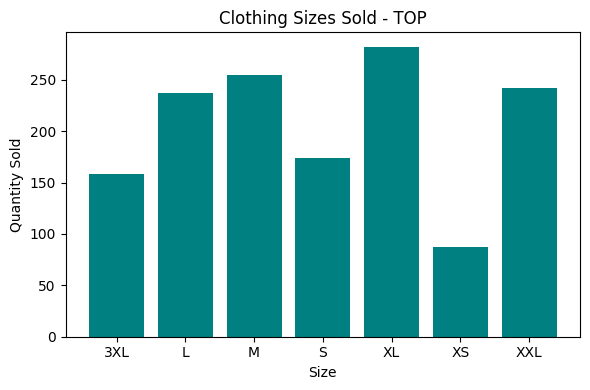

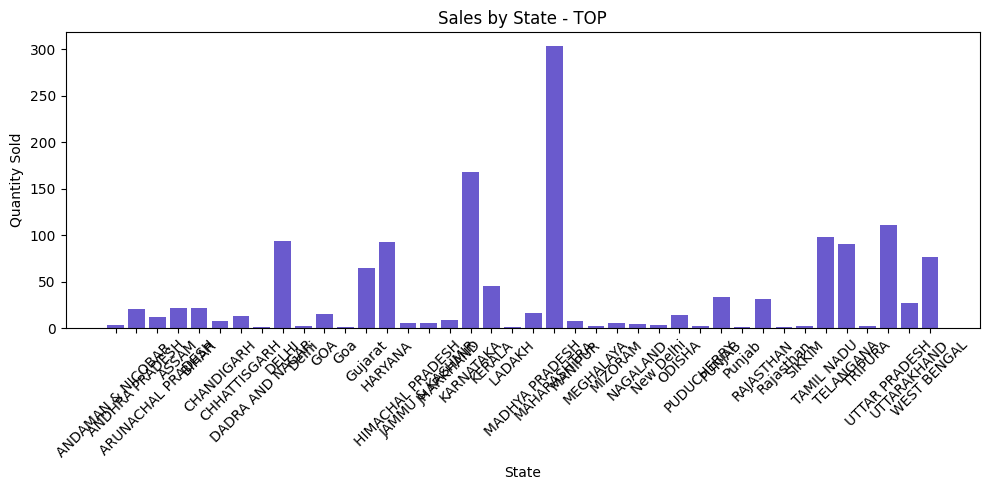

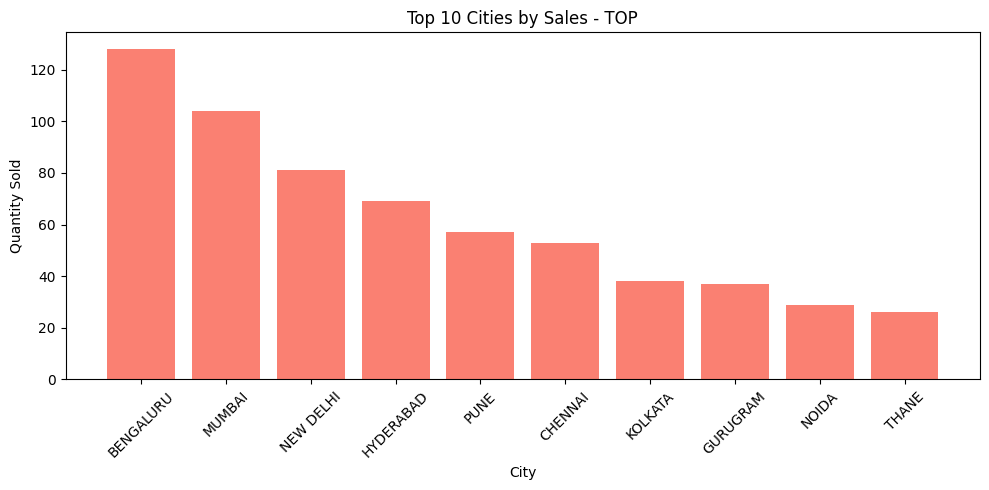

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Input from user
category_input = input("Enter the clothing category: ").strip().upper()

# Convert 'Category' column to string to avoid .str error
df['Category'] = df['Category'].astype(str)

# Filter the DataFrame by category
filtered_df = df[df['Category'].str.upper() == category_input]

# Check if any data found
if filtered_df.empty:
    print(f"❌ No data found for category: {category_input}")
else:
    # Group by size
    size_totals = filtered_df.groupby('Size')['Qty'].sum().reset_index()
    most_sold_size = size_totals.sort_values(by='Qty', ascending=False).iloc[0]
    least_sold_size = size_totals.sort_values(by='Qty', ascending=True).iloc[0]

    # Group by state
    state_totals = filtered_df.groupby('ship-state')['Qty'].sum().reset_index()
    most_sold_state = state_totals.sort_values(by='Qty', ascending=False).iloc[0]
    least_sold_state = state_totals.sort_values(by='Qty', ascending=True).iloc[0]

    # Group by city
    city_totals = filtered_df.groupby('ship-city')['Qty'].sum().reset_index()
    most_sold_city = city_totals.sort_values(by='Qty', ascending=False).iloc[0]

    # Get a city with the lowest sales in the least sold state
    state_city_df = filtered_df[filtered_df['ship-state'] == least_sold_state['ship-state']]
    city_in_least_state = state_city_df.groupby('ship-city')['Qty'].sum().reset_index()
    lowest_city_in_least_state = city_in_least_state.sort_values(by='Qty').iloc[0]

    # Print results
    print(f"\n📊 Analysis for Category: {category_input}")
    print(f"👕 Most sold size: {most_sold_size['Size']} ({most_sold_size['Qty']} units)")
    print(f"🔻 Least sold size: {least_sold_size['Size']} ({least_sold_size['Qty']} units)")
    print(f"📍 State with highest sales: {most_sold_state['ship-state']} ({most_sold_state['Qty']} units)")
    print(f"📉 State with lowest sales: {least_sold_state['ship-state']} ({least_sold_state['Qty']} units)")
    print(f"🏙️ City with highest sales: {most_sold_city['ship-city']} ({most_sold_city['Qty']} units)")
    print(f"📌 City with lowest sales in {least_sold_state['ship-state']}: {lowest_city_in_least_state['ship-city']} ({lowest_city_in_least_state['Qty']} units)")

 # ---------- PLOTTING GRAPHS ---------- #

    # Size vs Qty
    plt.figure(figsize=(6, 4))
    plt.bar(size_totals['Size'], size_totals['Qty'], color='teal')
    plt.title(f"Clothing Sizes Sold - {category_input}")
    plt.xlabel("Size")
    plt.ylabel("Quantity Sold")
    plt.tight_layout()
    plt.show()

    # State vs Qty
    plt.figure(figsize=(10, 5))
    plt.bar(state_totals['ship-state'], state_totals['Qty'], color='slateblue')
    plt.title(f"Sales by State - {category_input}")
    plt.xlabel("State")
    plt.ylabel("Quantity Sold")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Top 10 cities by sales
    top_10_cities = city_totals.sort_values(by='Qty', ascending=False).head(10)
    plt.figure(figsize=(10, 5))
    plt.bar(top_10_cities['ship-city'], top_10_cities['Qty'], color='salmon')
    plt.title(f"Top 10 Cities by Sales - {category_input}")
    plt.xlabel("City")
    plt.ylabel("Quantity Sold")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()